In [29]:
import sys
sys.executable

'/Users/clemens/.virtualenvs/myscipy/bin/python'

In [30]:
import numpy as np
import pandas as pd
import sys

from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("/Users/clemens/Documents/Code/AnalysisToolbox")

import spikeAnalysisToolsV2.data_loading as data
import spikeAnalysisToolsV2.synapse_analysis as synapse_analysis
import spikeAnalysisToolsV2.plotting as spikeplot
import spikeAnalysisToolsV2.helper as helper

In [31]:
path = "/Users/clemens/Documents/Code/ModelClemens/output/12_11-12_09_all_CT_reasonable_std/initial"
network_architecture = dict(num_inh_neurons_per_layer= 32*32, num_exc_neurons_per_layer= 64*64, num_layers=4)

In [32]:
synapses = data.load_network(path, True, True)
mask = synapse_analysis.Synapse_Mask(network_architecture, synapses)

# Multiplicity of Synapses
There can be an arbitraty number of synapses between 2 neurons. The model code paramters max_number_of_connections_per_pair and fan_in_count are redundant

In [33]:
synapse_count = synapse_analysis.multiple_connections_histogram(synapses)

the number maybe because the picking probability is gausian this exponentiall increase in frequency of neuron pairs with this number of synapses might make sense
9


(True, (0, 1, 63))

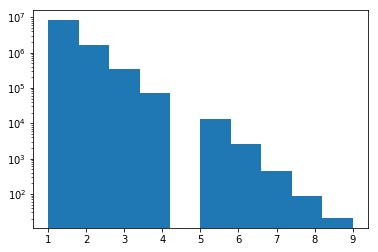

In [34]:
plt.hist(synapse_count.values)
plt.yscale('log', nonposy='clip')
print("the number maybe because the picking probability is gausian this exponentiall increase in frequency of neuron pairs with this number of synapses might make sense")

pre, post = synapse_count.argmax()
print(synapse_count.max())
helper.id_to_position(post, network_architecture)

# Outgoing Synapses
How many synapses leave each neuron. We can see that the ones right at the border have less outgoing synapses. Then it increases and then stabilizes in the middle. For explanantion see paper and keynote.

The effect increases with higher std of the gaussian.

In [35]:
outgoing_FF = synapse_analysis.count_outgoing_with_mask(synapses, mask.exc_feed_forward())
outgoing_FF_input, outgoing_FF_exc, outgoing_FF_inh = synapse_analysis.neuron_stats_to_layer(outgoing_FF, 8, 128*128, network_architecture)

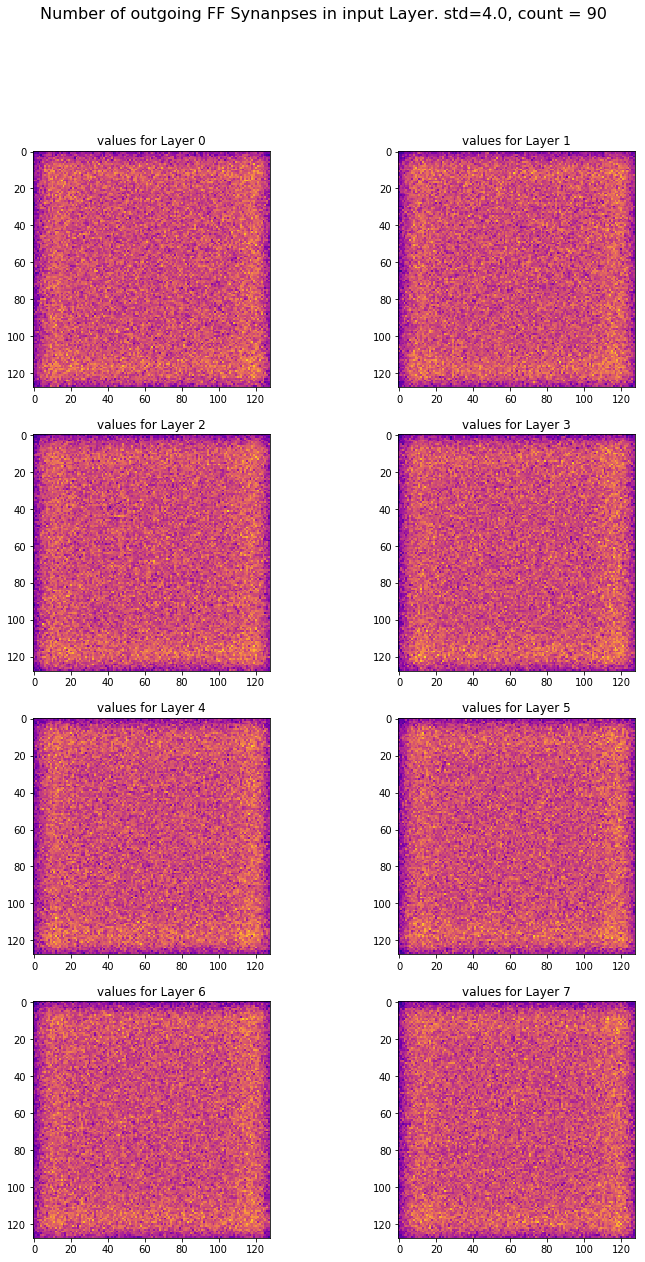

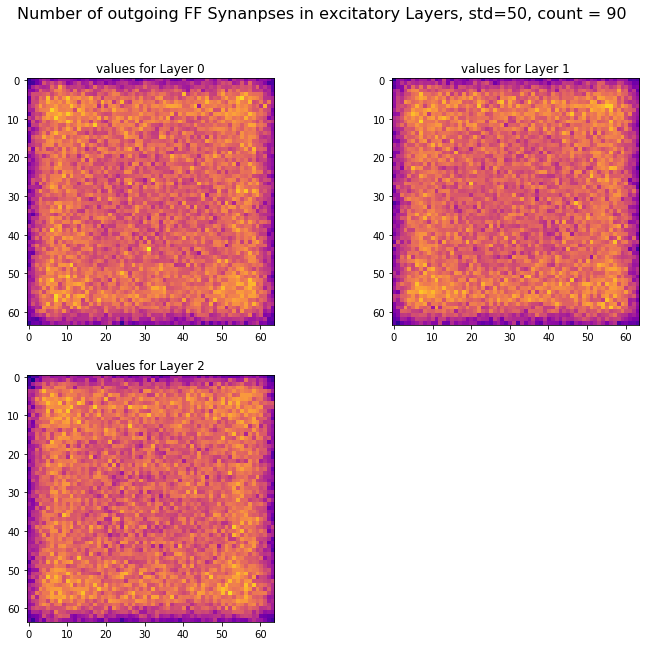

In [36]:
outgoing_FF_input, outgoing_FF_exc, outgoing_FF_inh = synapse_analysis.neuron_stats_to_layer(outgoing_FF, 8, 128*128, network_architecture)
spikeplot.show_values_all_things(outgoing_FF_input, "Number of outgoing FF Synanpses in input Layer. std=4.0, count = 90")
spikeplot.show_values_all_things(outgoing_FF_exc[:3, :], "Number of outgoing FF Synanpses in excitatory Layers, std=50, count = 90")

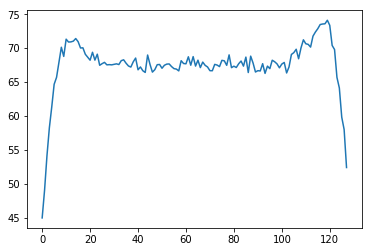

In [37]:
mat = helper.reshape_into_2d(outgoing_FF_input)
plt.plot(np.mean(mat[3, :, :], axis=1))

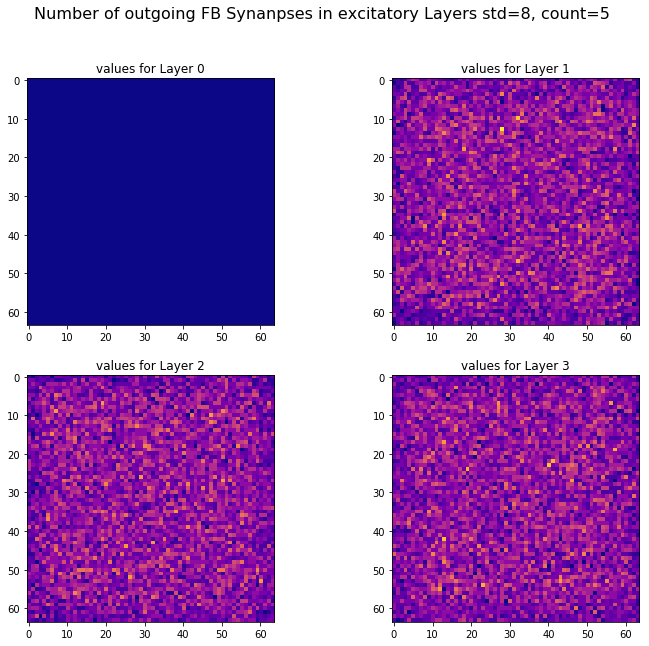

In [38]:
outgoing_FB = synapse_analysis.count_outgoing_with_mask(synapses, mask.exc_feed_back())
outgoing_FB_input, outgoing_FB_exc, outgoing_FB_inh = synapse_analysis.neuron_stats_to_layer(outgoing_FB, 6, 128*128, network_architecture)

spikeplot.show_values_all_things(outgoing_FB_exc[:, :], "Number of outgoing FB Synanpses in excitatory Layers std=8, count=5")


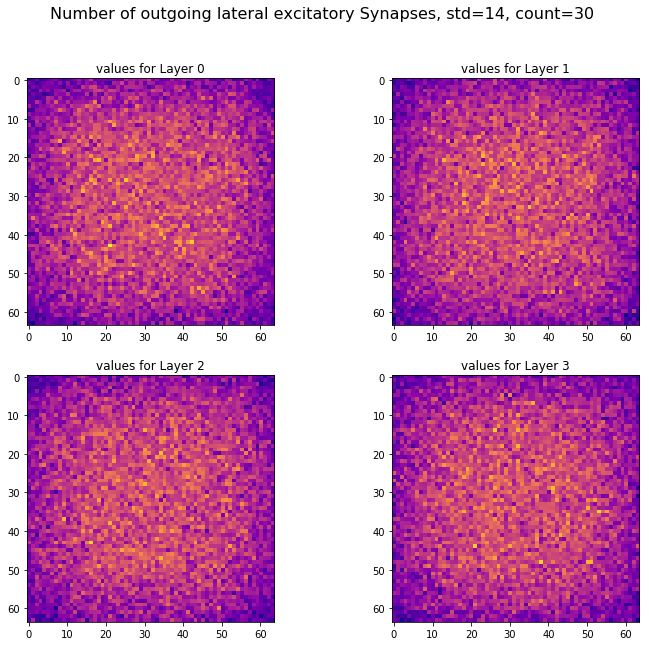

In [39]:
outgoing_Exc_L = synapse_analysis.count_outgoing_with_mask(synapses, mask.exc_lateral())
outgoing_Exc_L_input, outgoing_Exc_L_exc, outgoing_Exc_L_inh = synapse_analysis.neuron_stats_to_layer(outgoing_Exc_L, 6, 128*128, network_architecture)

spikeplot.show_values_all_things(outgoing_Exc_L_exc, "Number of outgoing lateral excitatory Synapses, std=14, count=30")

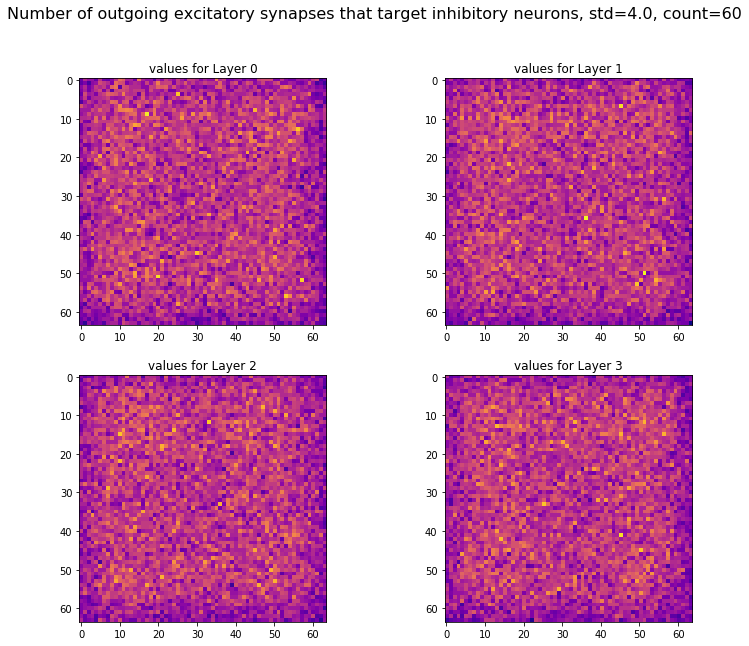

In [40]:
outgoing_exc_to_inh = synapse_analysis.count_outgoing_with_mask(synapses, mask.exc_to_inhibitory())
outgoing_exc_to_inh_input, outgoing_exc_to_inh_exc, outgoing_exc_to_inh_inh = synapse_analysis.neuron_stats_to_layer(outgoing_exc_to_inh, 6, 128*128, network_architecture)

spikeplot.show_values_all_things(outgoing_exc_to_inh_exc, "Number of outgoing excitatory synapses that target inhibitory neurons, std=4.0, count=60")


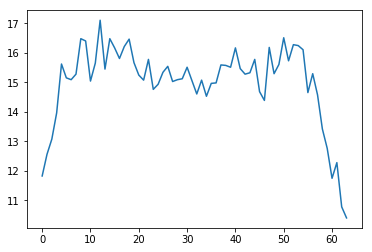

In [41]:
mat = helper.reshape_into_2d(outgoing_exc_to_inh_exc)
plt.plot(np.mean(mat[2, :, :], axis=1))

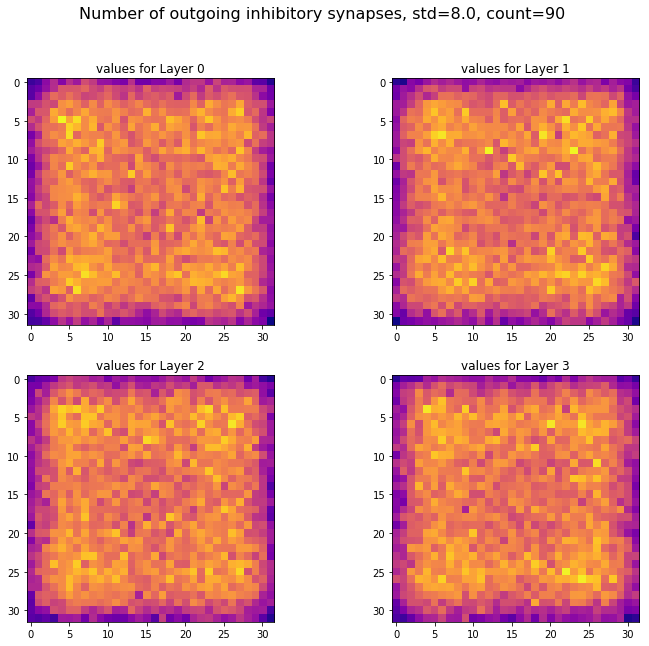

In [42]:
outgoing_inhibitory = synapse_analysis.count_outgoing_with_mask(synapses, mask.inh_lateral())
outgoing_inh_input, outgoing_inh_exc, outgoing_inh_inh = synapse_analysis.neuron_stats_to_layer(outgoing_inhibitory, 6, 128*128, network_architecture)

spikeplot.show_values_all_things(outgoing_inh_inh, "Number of outgoing inhibitory synapses, std=8.0, count=90")

# Receptive Fields
## Presynaptic neurons for given postsynaptic target neuron

### Excitatory FF

In [43]:
excitatory_FF_synapses = synapses[mask.exc_feed_forward()]
e2e_FF = excitatory_FF_synapses

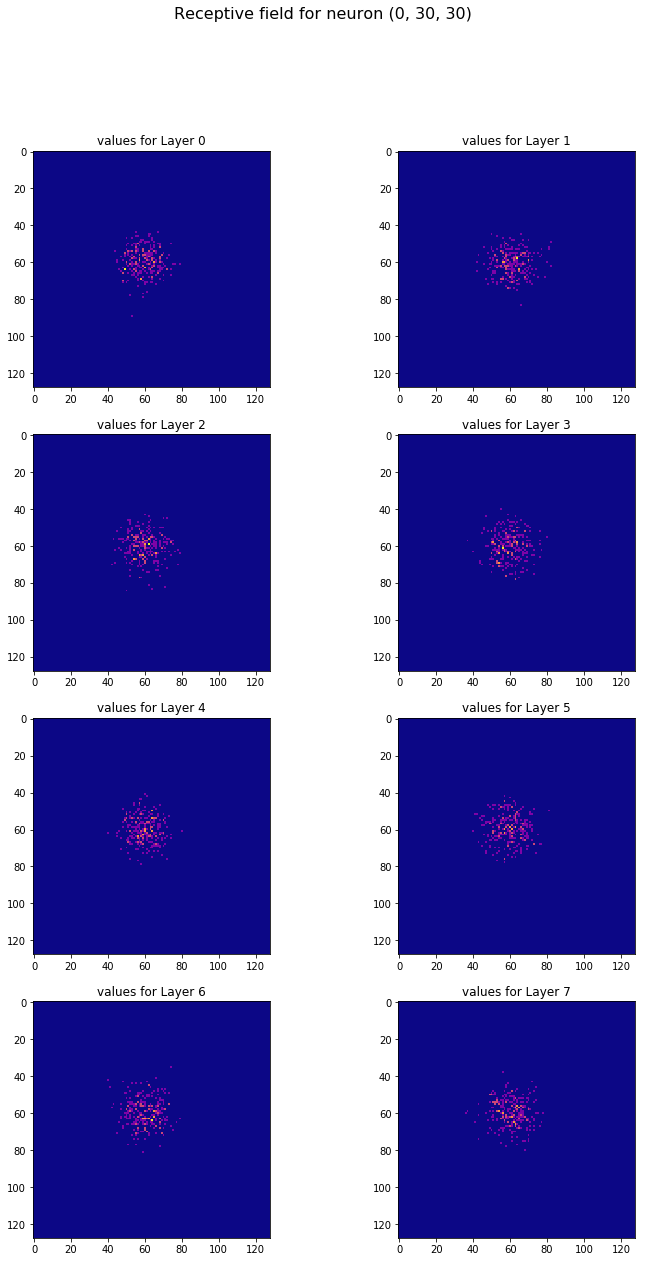

In [44]:
neuron_pos = (0, 30, 30)
recpField = synapse_analysis.receptive_field_of_neuron_input(neuron_pos, excitatory_FF_synapses, network_architecture, 128, 8)
spikeplot.show_values_all_things(recpField, "Receptive field for neuron {}".format(neuron_pos))

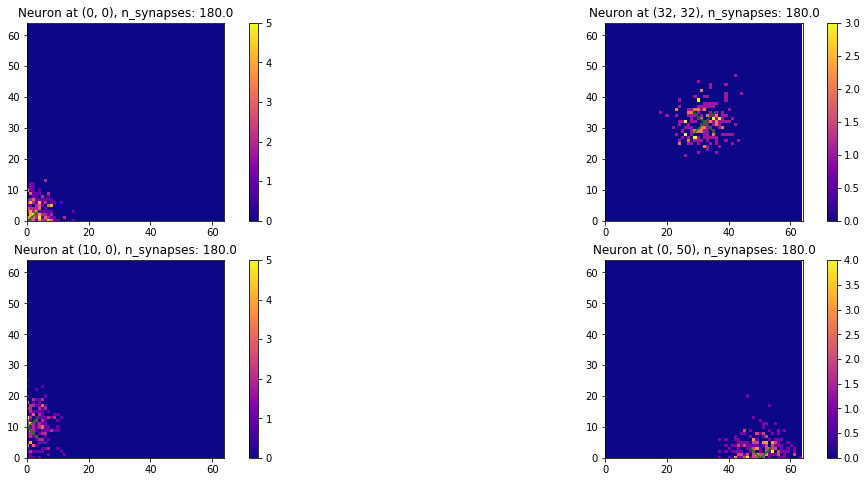

In [45]:
interested_neurons = [(0,0), (32,32), (10, 0), (0, 50)]
spikeplot.show_connection_fields(excitatory_FF_synapses, 1, True, interested_neurons, network_architecture)

### I2E Lateral

In [46]:
i2e = synapses[mask.inh_lateral()]

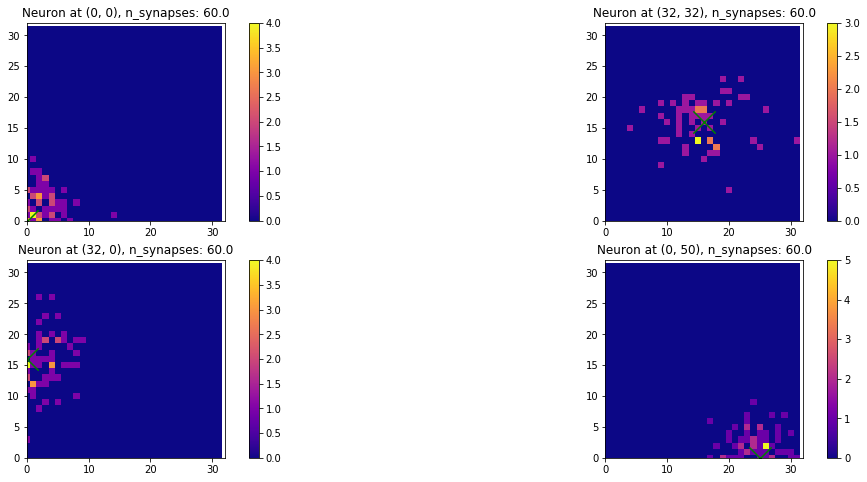

In [47]:
interested_neurons = [(0,0), (32,32), (32, 0), (0, 50)]
spikeplot.show_connection_fields(i2e, 1, True, interested_neurons, network_architecture)

### Excitatory 2 Inhibitory

In [48]:
e2i_L = synapses[mask.exc_to_inhibitory()]

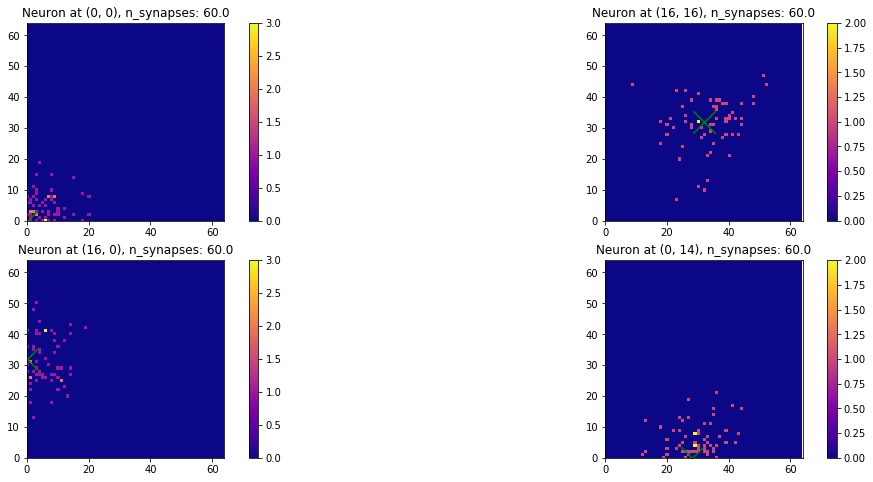

In [49]:
interested_neurons = [(0,0), (16,16), (16, 0), (0, 14)]
spikeplot.show_connection_fields(e2i_L, 1, False, interested_neurons, network_architecture)

## Postsynaptic Neurons for given presynaptic source neuron

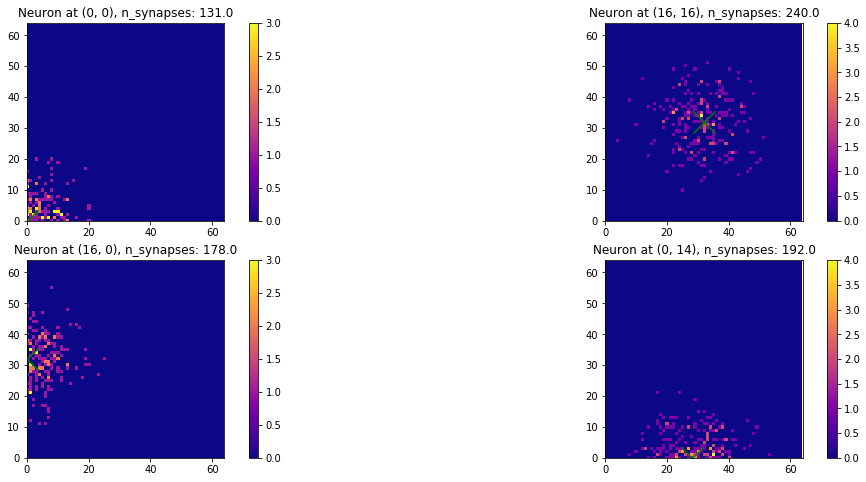

In [50]:
interested_neurons = [(0,0), (16,16), (16, 0), (0, 14)]
spikeplot.show_connection_fields(i2e, 1, False, interested_neurons, network_architecture, mode='targets')

** Stuff happening in the lower left corner for example causes a lot less inhibition (also see total count of synapses) **

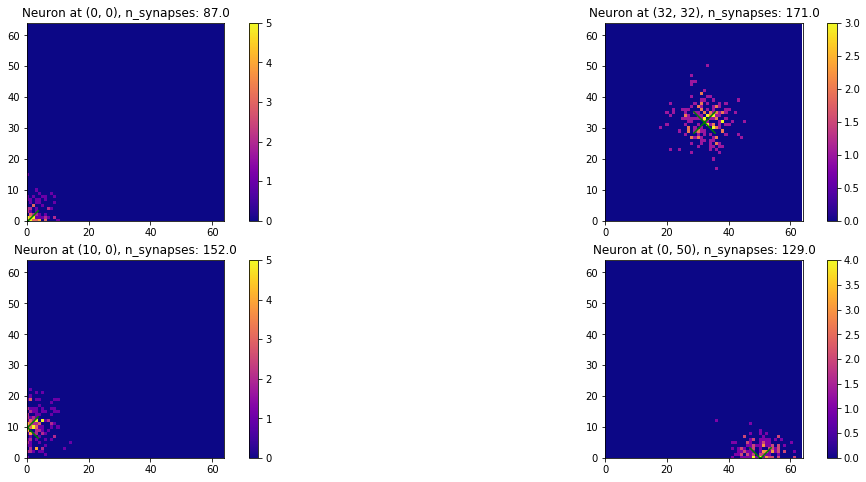

In [51]:
interested_neurons = [(0,0), (32,32), (10, 0), (0, 50)]
spikeplot.show_connection_fields(e2e_FF, 1, True, interested_neurons, network_architecture, mode='targets')

### Looking at one inhibitory neuron

In [52]:
interested_neurons = [(0,0), (16,16), (5, 0), (0, 25)]

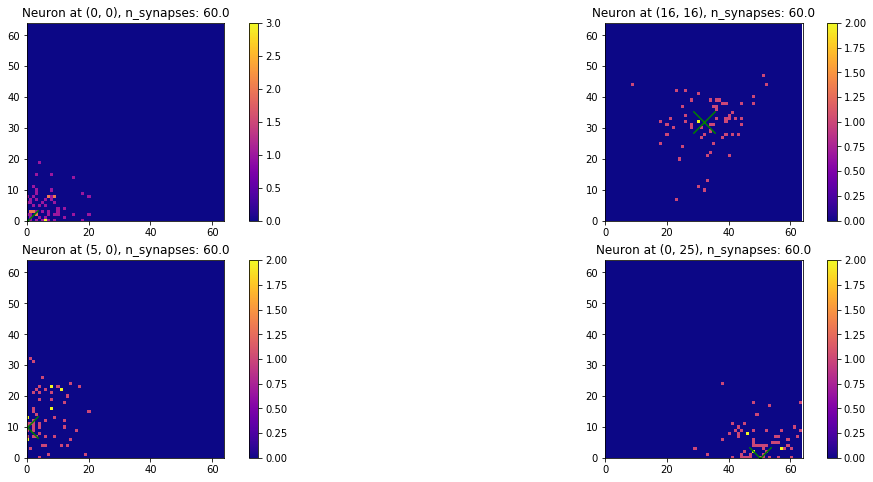

In [53]:
spikeplot.show_connection_fields(e2i_L, 1, False, interested_neurons, network_architecture, mode='sources')

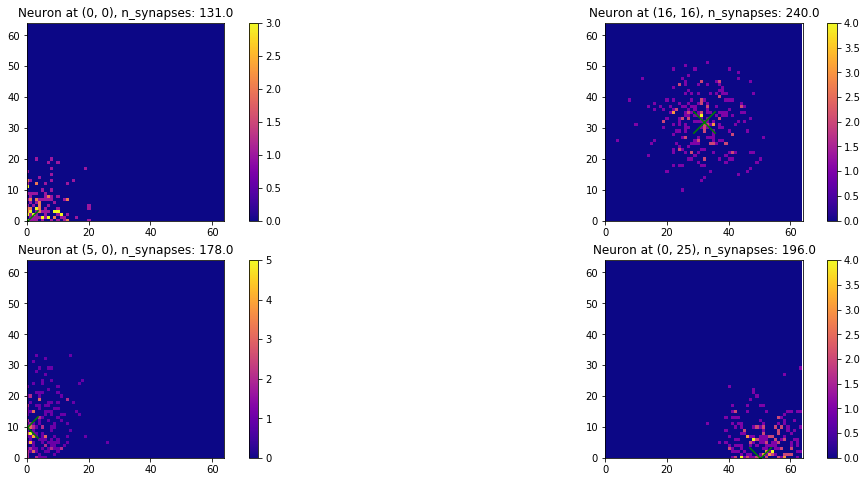

In [54]:
spikeplot.show_connection_fields(i2e, 1, False, interested_neurons, network_architecture, mode='targets')